In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Import CIFAR dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train[:,0]
y_test = y_test[:,0]

170498071/170498071 [==============================] - 94s 1us/step


Visualize dataset dimension

In [3]:
print("x_train array shape: ", x_train.shape)
print("y_train array shape: ", y_train.shape)
print("x_test array shape: ", x_test.shape)
print("y_test array shape: ", y_test.shape)


x_train array shape:  (50000, 32, 32, 3)
y_train array shape:  (50000,)
x_test array shape:  (10000, 32, 32, 3)
y_test array shape:  (10000,)


Visualize some images in the dataset and their label

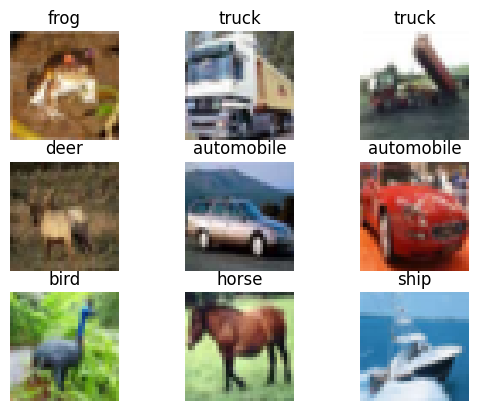

In [4]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(labels[int(y_train[i])])
  plt.axis("off")
plt.show()

Divide the dataset to obtain 3 sets: x_t (data used for train), x_val (data used for validation), x_test (data used for test).

The labels for these data are stored in y_t, y_val, y_test.

In [5]:
x_t = x_train[:int(0.8*x_train.shape[0]),:]
y_t = y_train[:int(0.8*y_train.shape[0])]
x_val = x_train[int(0.8*x_train.shape[0]):,:]
y_val = y_train[int(0.8*y_train.shape[0]):]

print('x_train shape: ', x_t.shape)
print('y_train shape: ', y_t.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000,)
x_val shape:  (10000, 32, 32, 3)
y_val shape:  (10000,)


Normalize input data

In [6]:
x_t = x_t / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

Definition of the model. Since we are using convolutional layers, this network is called Convolutional Neural Network (CNN)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3), name='C0'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MP0'),
    tf.keras.layers.BatchNormalization(name='BN0'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', name='C1'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', name='C2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='MP2'),
    tf.keras.layers.BatchNormalization(name='BN2'),
    tf.keras.layers.Flatten(name='F2'),
    tf.keras.layers.Dense(256, activation='relu', name='D2'),
    tf.keras.layers.Dense(10, activation="softmax", name='D3')])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C0 (Conv2D)                 (None, 28, 28, 32)        2432      
                                                                 
 MP0 (MaxPooling2D)          (None, 14, 14, 32)        0         
                                                                 
 BN0 (BatchNormalization)    (None, 14, 14, 32)        128       
                                                                 
 C1 (Conv2D)                 (None, 10, 10, 32)        25632     
                                                                 
 C2 (Conv2D)                 (None, 6, 6, 32)          25632     
                                                                 
 MP2 (MaxPooling2D)          (None, 3, 3, 32)          0         
                                                                 
 BN2 (BatchNormalization)    (None, 3, 3, 32)         

In [8]:

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])


Train the model

In [9]:
model.fit(x_t,
          y_t,
          epochs=10,
          batch_size=16,
          validation_data=(x_test, y_test)
          )

Epoch 1/10


2500/2500 [==============================] - 20s 7ms/step - loss: 1.7539 - accuracy: 0.3659 - val_loss: 1.6624 - val_accuracy: 0.4075
Epoch 2/10
2500/2500 [==============================] - 20s 8ms/step - loss: 1.5025 - accuracy: 0.4622 - val_loss: 1.4132 - val_accuracy: 0.4764
Epoch 3/10
2500/2500 [==============================] - 18s 7ms/step - loss: 1.3831 - accuracy: 0.5093 - val_loss: 1.4232 - val_accuracy: 0.4866
Epoch 4/10
2500/2500 [==============================] - 19s 8ms/step - loss: 1.3039 - accuracy: 0.5404 - val_loss: 1.3266 - val_accuracy: 0.5246
Epoch 5/10
2500/2500 [==============================] - 19s 8ms/step - loss: 1.2374 - accuracy: 0.5646 - val_loss: 1.2565 - val_accuracy: 0.5574
Epoch 6/10
2500/2500 [==============================] - 19s 7ms/step - loss: 1.1821 - accuracy: 0.5875 - val_loss: 1.2960 - val_accuracy: 0.5593
Epoch 7/10
2500/2500 [==============================] - 19s 8ms/step - loss: 1.1461 - accuracy: 0.5993 - val_loss: 1.3405 - val_

Evaluate performances and show the confusion matrix.

313/313 [==============================] - 1s 4ms/step


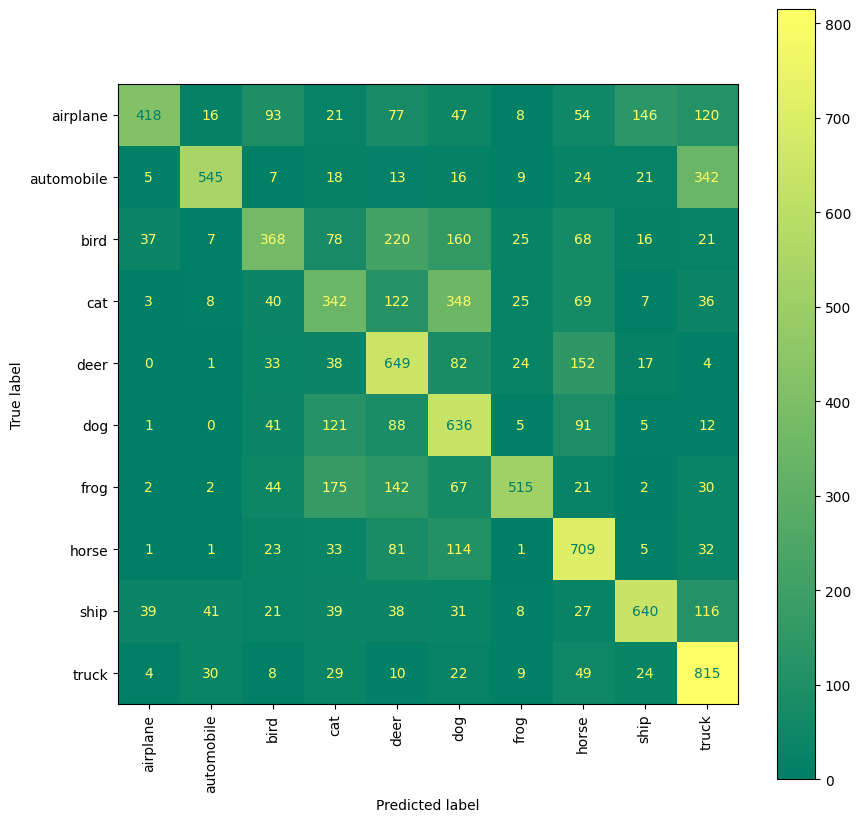

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

evaluation = model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()